In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df =pd.read_csv('seeds_dataset.csv')
df=df.drop('Class_(1, 2, 3)',axis=1)
df.head()

,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


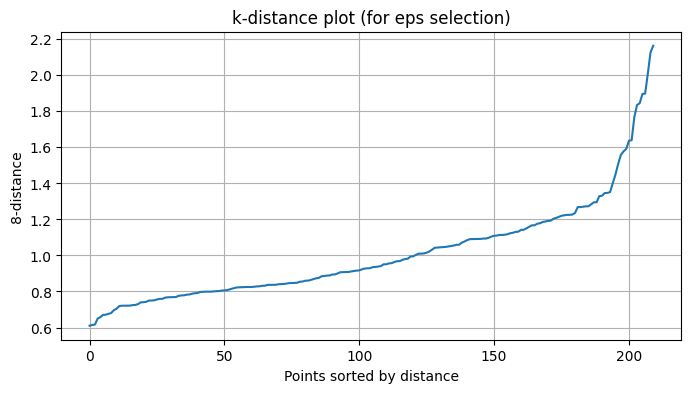

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

scale=StandardScaler()
scaled =scale.fit_transform(df)

df=pd.DataFrame(scaled,columns=df.columns)

min_samples =8
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(df)
distance, indices =nn.kneighbors(df)

k_distance =distance[:,-1]
k_distance_sorted = np.sort(k_distance)

plt.figure(figsize=(8,4))
plt.plot(k_distance_sorted)
plt.ylabel(f"{min_samples}-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance plot (for eps selection)")
plt.grid(True)
plt.show()



In [40]:
db= DBSCAN(eps=1.3,min_samples=min_samples)
pred=db.fit_predict(df)
df['cluster'] = pred

df_cleaned = df[df['cluster'] != -1].copy()


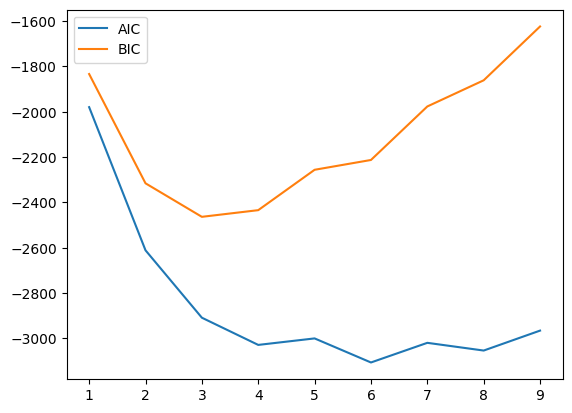

In [41]:
from sklearn.mixture import GaussianMixture

aic =[] # akaike information criterion
bic =[] # bayesian infrontion criterion

for i in range(1,10):
    gmm =GaussianMixture(n_components=i)
    gmm.fit_predict(df_cleaned)
    aic.append(gmm.aic(df_cleaned))
    bic.append(gmm.bic(df_cleaned))

plt.plot(range(1,10), aic, label='AIC')
plt.plot(range(1,10), bic, label='BIC')
plt.legend()

In [44]:
gmm = GaussianMixture(n_components=4, random_state=42)
pred = gmm.fit_predict(df_cleaned)
probs = gmm.predict_proba(df_cleaned)

df_cleaned['cluster'] = pred

# Add probability columns
for i in range(probs.shape[1]):
    df_cleaned[f'prob_cluster_{i}'] = probs[:, i]

df_cleaned['cluster'].value_counts()
df_cleaned.sample(5)


,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,cluster,prob_cluster_0,prob_cluster_1,prob_cluster_2,prob_cluster_3
161,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099,1,0.0,9.998061e-01,0.0,0.000194
71,0.686407,0.852529,-0.369004,0.835884,0.598160,0.649878,0.956394,2,0.0,0.000000e+00,1.0,0.000000
106,1.378850,1.236305,1.467836,1.184294,1.452693,-0.571478,1.615163,0,1.0,0.000000e+00,0.0,0.000000
193,-1.387479,-1.327314,-1.925864,-1.014765,-1.668209,0.768547,-0.650756,3,0.0,2.204818e-07,0.0,1.000000
145,-1.253124,-1.097049,-2.303414,-0.790786,-1.516941,1.645896,-0.271403,3,0.0,1.311833e-02,0.0,0.986882
